In [ ]:
# Import basic data science packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import map visulization libraries
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Import encoders for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
accepted_df = pd.read_csv('./accepted/accepted_2007_to_2018Q4.csv')

In [ ]:
accepted_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accepted_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
accepted_df.shape

(2260701, 151)

In [ ]:
accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
accepted_df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


## **Analysis**

_We first begin to look at our data to better understand our demographics. We start by taking a look at the length of employment for our customers._

_We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly._

**_What we need to know:_**

  - Understand what amount was mostly issued to borrowers.
  - Which year issued the most loans.
  - The distribution of loan amounts is a multinomial distribution .

**_Summary:_**

  - Most of the loans issued were in the range of 10,000 to 20,000 USD.
  - The year of 2015 was the year were most loans were issued.
  - Loans were issued in an incremental manner. (Possible due to a recovery in the U.S economy)
  - The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.


Text(0.5, 1.0, 'Total committed by Investors')

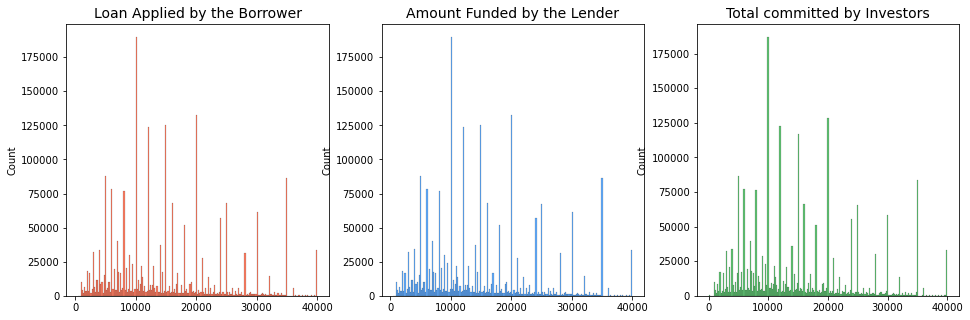

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))


loan_amnt = accepted_df["loan_amnt"].values
funded_amnt = accepted_df["funded_amnt"].values
funded_amnt_inv = accepted_df["funded_amnt_inv"].values


sns.histplot(loan_amnt, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.histplot(funded_amnt, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.histplot(funded_amnt_inv, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [ ]:
# Lets' transform the issue dates by year and month i.e converting to datetime.

accepted_df['issue_d'].head()
dt_series = pd.to_datetime(accepted_df['issue_d'])
accepted_df['issue_d_year'] = dt_series.dt.year
accepted_df['issue_d-month'] = dt_series.dt.month

Text(0, 0.5, 'Average loan amount issued')

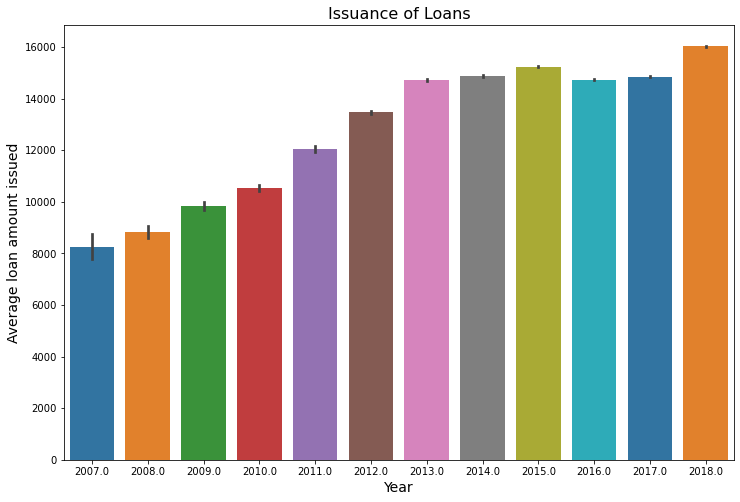

In [ ]:
# The year of 2018 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.

plt.figure(figsize=(12,8))
sns.barplot('issue_d_year', 'loan_amnt', data=accepted_df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

### **Good Loans vs Bad Loans:**

_In this section, we will see what is the amount of bad loans Lending Club has declared so far, of course we have to understand that there are still loans that are at a risk of defaulting in the future_.

_**What we need to know:**_

   - The amount of bad loans could increment as the days pass by, since we still have a great amount of current loans.
   - Average annual income is an important key metric for finding possible opportunities of investments in a specific region.

_**Summary:**_

   - Currently, bad loans consist 7.60% of total loans but remember that we still have current loans which have the risk of becoming bad loans. (So this percentage is subjected to possible changes.)
   - The NorthEast region seems to be the most attractive in term of funding loans to borrowers.
   - The SouthWest and West regions have experienced a slight increase in the "median income" in the past years.
   - Average interest rates have declined since 2012 but this might explain the increase in the volume of loans.
   - Employment Length tends to be greater in the regions of the SouthWest and West
   - Clients located in the regions of NorthEast and MidWest have not experienced a drastic increase in debt-to-income(dti) as compared to the other regions.


In [ ]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


accepted_df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
accepted_df['loan_condition'] = accepted_df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

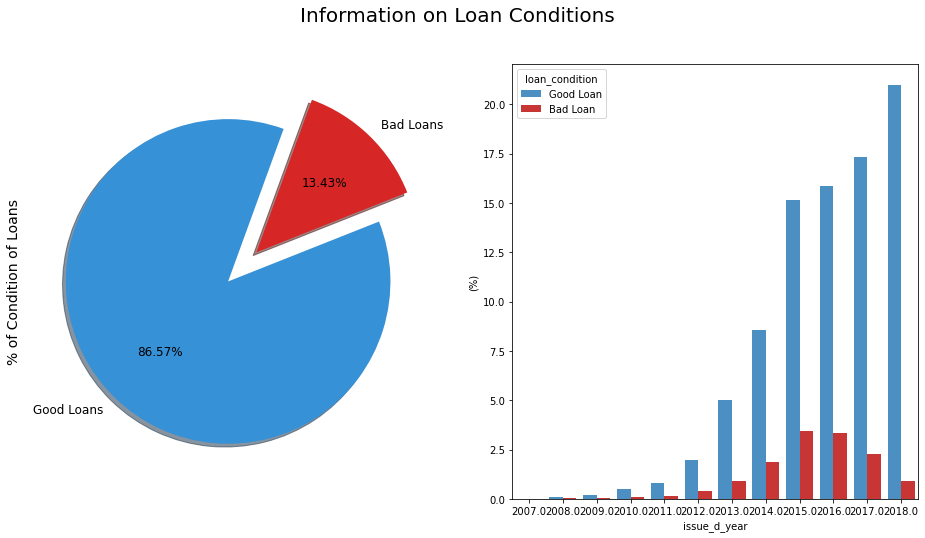

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

accepted_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="issue_d_year", y="loan_amnt", hue="loan_condition", data=accepted_df, palette=palette, estimator=lambda x: len(x) / len(accepted_df) * 100)
ax[1].set(ylabel="(%)")

In [ ]:
# make temporary dataframe in order to keep original dataframe

accepted_df_copy = accepted_df.copy()
accepted_df_copy["emp_length"] = ["0.5" if x == '< 1 year' else x for x in accepted_df_copy["emp_length"]]

# check employment length
accepted_df_copy.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '0.5', nan],
      dtype=object)

<AxesSubplot:title={'center':'The distribution of loan amounts by status'}, xlabel='loan_amnt', ylabel='loan_status'>

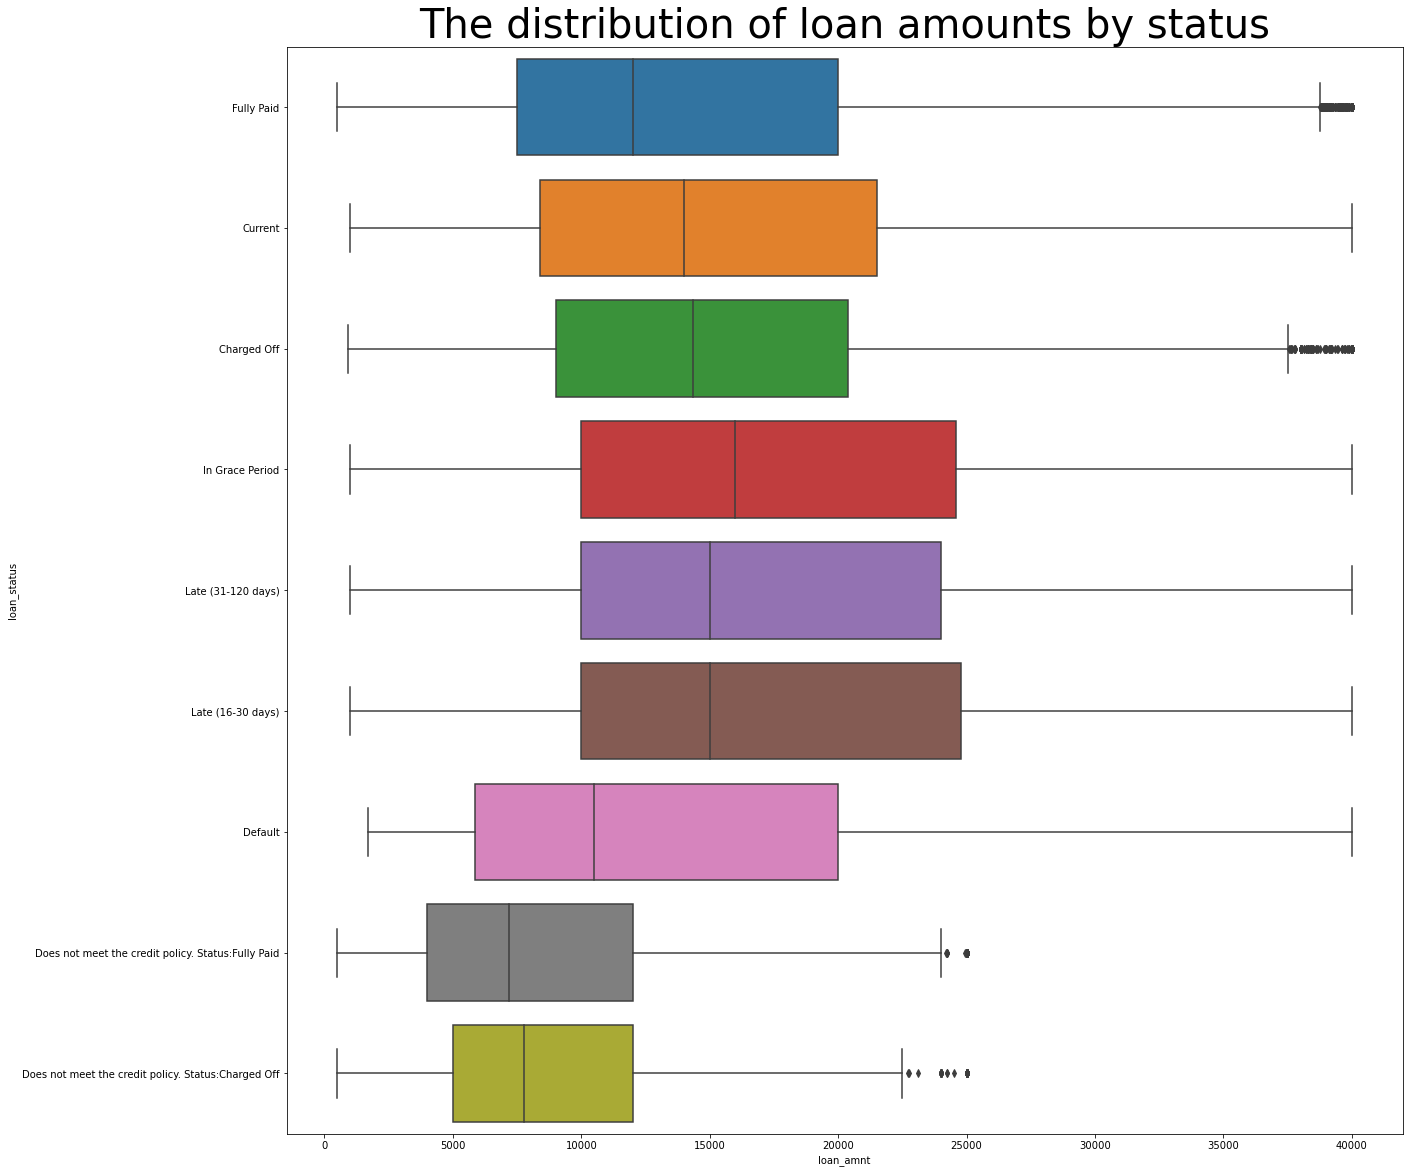

In [ ]:
# Loan amount by its status

plt.subplots(figsize=(20,20))
plt.title("The distribution of loan amounts by status").set_size(40)
sns.boxplot(x="loan_amnt", y="loan_status", data=accepted_df)


**_Summary_**

  -  Fully Paid loans tend to be smaller. This could be due to the age of the loans
  -  Default has the highest count among other loan status.
  -  In Grace Period and Late(16~30 days) have the highest loan amount and mean.



### **Loan Amount Base on Grade**

_The next question we wanted to answer was "What kind of loans are being issued?". We decided to approach this by the grade that LendingClub assigns to the loan. The Grade is a value from A to G that is a culmination of LendingClubs own analysis on the ability for the customer to repay the grade._


<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

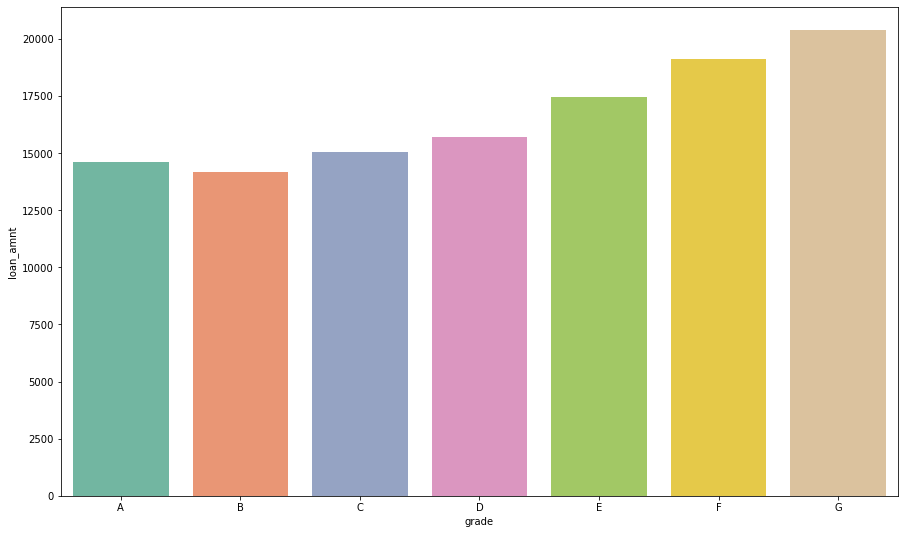

In [ ]:
group = accepted_df.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')


**_Summary_**

   - The lower grade, the higher loan amount loan issued


### **Interest Rate base on Grade**

_We also wanted to look at the distribution of interst rate that loans are given, based on their LendingClub assigned grade._

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

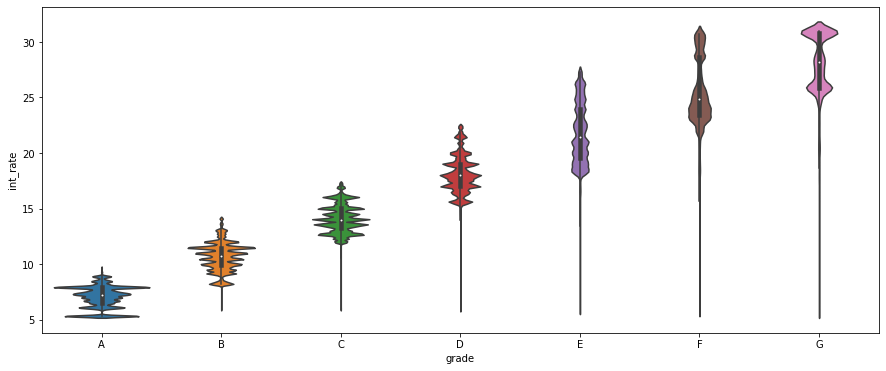

In [ ]:
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=accepted_df, order="ABCDEFG")


**_Summary:_**

   - Interest rate varies wildly, reaching nearly 30% for high-risk loans
   - Grade A has the lowest interest rate around 7%
   - Grade G has the highest interest rate above 25%


### **Loan status by grade**

_We were also curious how accurate LendingClub's Grades were. This is a look into what percentage of loans are current or already paid off by grade._

In [ ]:
print("% of loans that are current or fully paid by grade")
print(f"A: {round((103322+39679)/(2617+103322+47+39679+365+134+492) * 100, 2)}%")
print(f"B: {round((171735+66546)/(9519+171735+198+66546+1240+410+2004) * 100, 2)}%")
print(f"C: {round((171175+52678)/(12642+171175+360+52678+1887+678+3339) * 100, 2)}%")
print(f"D: {round((91984+30020)/(10486+91984+312+30020+1405+369+2890) * 100, 2)}%")
print(f"E: {round((47061+12928)/(6258+47061+201+12928+908+368+1852) * 100, 2)}%")
print(f"F: {round((13589+4726)/(2934+13589+79+4726+354+155+768)* 100, 2)}%")
print(f"G: {round((2913+1146)/(792+2913+22+1146+94+42+246)* 100, 2)}%")

pd.pivot_table(accepted_df, index="loan_status", columns="grade", aggfunc="size")

% of loans that are current or fully paid by grade
A: 97.51%
B: 94.69%
C: 92.21%
D: 88.75%
E: 86.22%
F: 81.02%
G: 77.24%


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,14201.0,52569.0,85649.0,61054.0,36035.0,14491.0,4560.0
Current,195539.0,262903.0,255707.0,115138.0,38080.0,8485.0,2465.0
Default,5.0,7.0,8.0,13.0,6.0,1.0,NaN
Does not meet the credit policy. Status:Charged Off,8.0,85.0,148.0,197.0,158.0,93.0,72.0
Does not meet the credit policy. Status:Fully Paid,90.0,269.0,481.0,494.0,378.0,154.0,122.0
Fully Paid,220889.0,340172.0,296037.0,139899.0,57615.0,17567.0,4572.0
In Grace Period,632.0,1771.0,2993.0,1899.0,799.0,240.0,102.0
Late (16-30 days),341.0,993.0,1476.0,969.0,402.0,129.0,39.0
Late (31-120 days),1322.0,4788.0,7554.0,4761.0,2166.0,640.0,236.0


### **Loans Issued by Region**
_In this section we want to analyze loans issued by region in order to see region patters that will allow us to understand which region gives Lending Club._

**_Summary:_**

   - SouthEast , West and NorthEast regions had the highest amount lof loans issued.
   - West and SouthWest had a rapid increase in debt-to-income starting in 2012.
   - West and SouthWest had a rapid decrease in interest rates (This might explain the increase in debt to income).


In [ ]:
accepted_df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



accepted_df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


accepted_df['region'] = accepted_df['addr_state'].apply(finding_regions)

In [ ]:
# This code will take the current date and transform it into a year-month format

accepted_df['complete_date'] = pd.to_datetime(accepted_df['issue_d'])

group_dates = accepted_df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5, 1.0, 'Loans issued by Region')

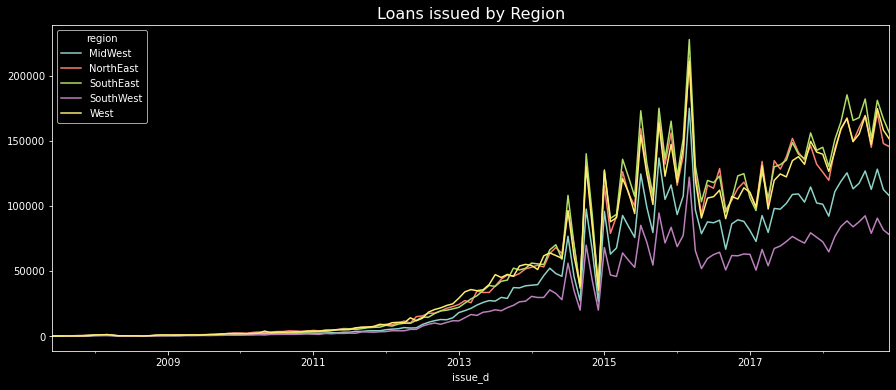

In [ ]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [ ]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [accepted_df]
accepted_df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

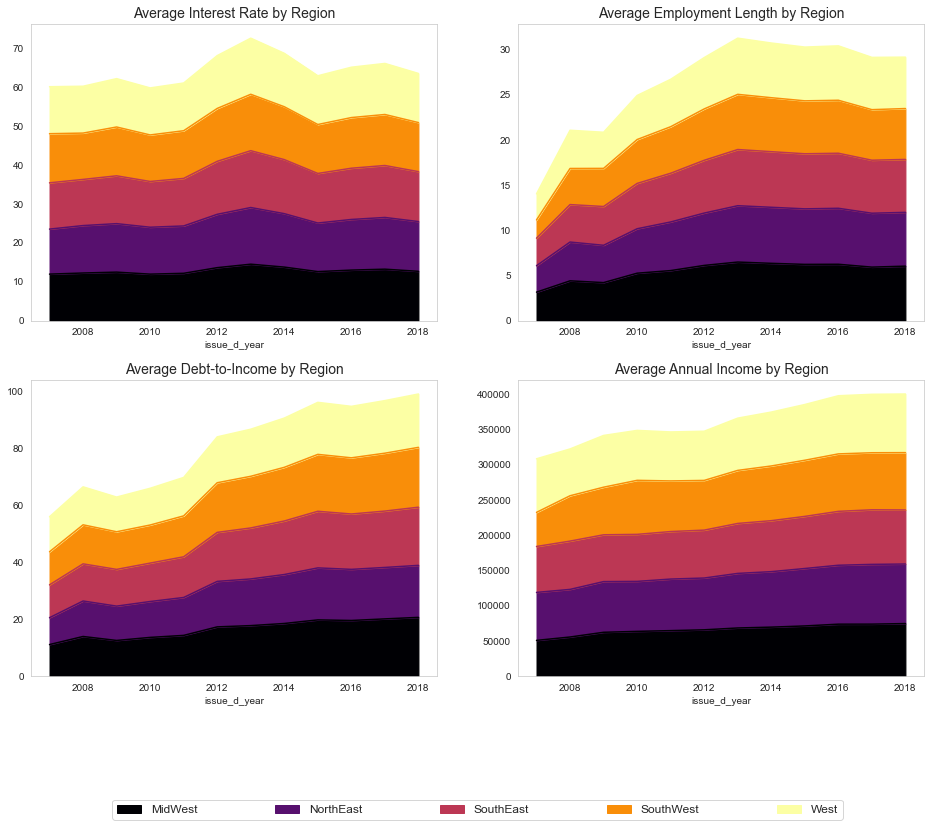

In [ ]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = accepted_df.groupby(['issue_d_year', 'region']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = accepted_df.groupby(['issue_d_year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)


by_dti = accepted_df.groupby(['issue_d_year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)


by_income = accepted_df.groupby(['issue_d_year', 'region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)


### **A Deeper Look into Bad Loans:**

**_What we need to know:_**

   - The number of loans that were classified as bad loans for each region by its loan status. (This will be shown in a dataframe below.)
   - This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a deeper insight on the level of risk in a particular region.

**_Summary:_**

   - The regions of the West and SouthEast had a higher percentage in most of the b "bad" loan statuses.
   - The NorthEast region had a higher percentage in Grace Period and Does not meet Credit Policy loan status. However, both of these are not considered as bad as default for instance.
   - Based on this small and brief summary we can conclude that the West and SouthEast regions have the most undesirable loan status, but just by a slightly higher percentage compared to the NorthEast region.
   - Again, this does not tell us what causes a loan to be a bad loan , but it gives us some idea about the level of risk within the regions across the United States.

In [ ]:
# We have 67429 loans categorized as bad loans
badloans_df = accepted_df.loc[accepted_df["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Does not meet the credit policy. Status:Charged Off'] = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,Does not meet the credit policy. Status:Charged Off,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,
MidWest,46377,7,142,1405,649,3476,52056
NorthEast,62535,13,190,2228,1110,5181,71257
SouthEast,67229,7,184,2164,1138,5549,76271
SouthWest,32712,6,79,964,515,2671,36947
West,59706,7,166,1675,937,4590,67081


## **The Business Perspective **

### Understanding the Operative Side of Business 

_Now we will have a closer look at the operative side of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!_

**_What we need to know:_**

   - We will focus on three key metrics: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state.
   - The purpose of this analysis is to see states that give high returns at a descent risk.

**_Summary:_**

   - California, Texas, New York and Florida are the states in which the highest amount of loans were issued.
   - Interesting enough, all four states have a approximate interest rate of 13% which is at the same level of the average interest rate for all states (13.24%)
   - California, Texas and New York are all above the average annual income (with the exclusion of Florida), this might give possible indication why most loans are issued in these states.

In [ ]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = accepted_df.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = accepted_df.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = accepted_df.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('int_rate', average_interest_rates),
                            ('annual_inc', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()

,state_codes,issued_loans,int_rate,annual_inc
0,IA,1.140750e+05,12.63,44756.21
1,IL,1.410452e+09,12.96,79884.92
2,IN,5.507767e+08,13.18,70365.19
3,KS,2.838778e+08,13.00,71456.55
4,MI,8.416461e+08,13.16,71660.97


### **The Importance of Credit Scores:**

_Credit scores are important metrics for assesing the overall level of risk. In this section we will analyze the level of risk as a whole and how many loans were bad loans by the type of grade received in the credit score of the customer._

**_What we need to know:_**

   - The lower the grade of the credit score, the higher the risk for investors.
   - There are different factors that influence on the level of risk of the loan.

**_Summary:_**

   - The scores that has a lower grade received a larger amounts of loans (which might had contributed to a higher level of risk).

   - Logically, the lower the grade the higher the interest the customer had to pay back to investors.

   - Interstingly, customers with a grade of "C" were more likely to default on the loan 

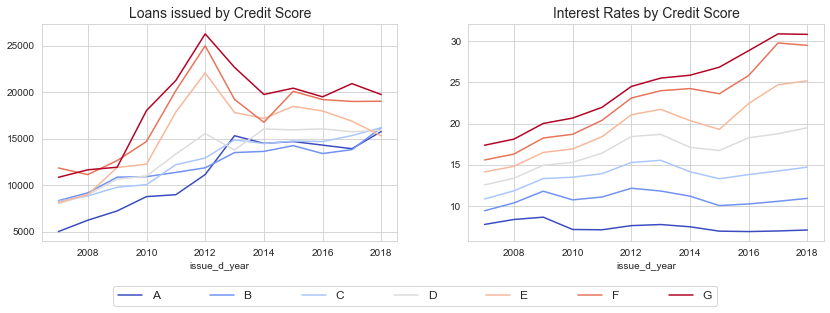

In [ ]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = accepted_df.groupby(['issue_d_year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = accepted_df.groupby(['issue_d_year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

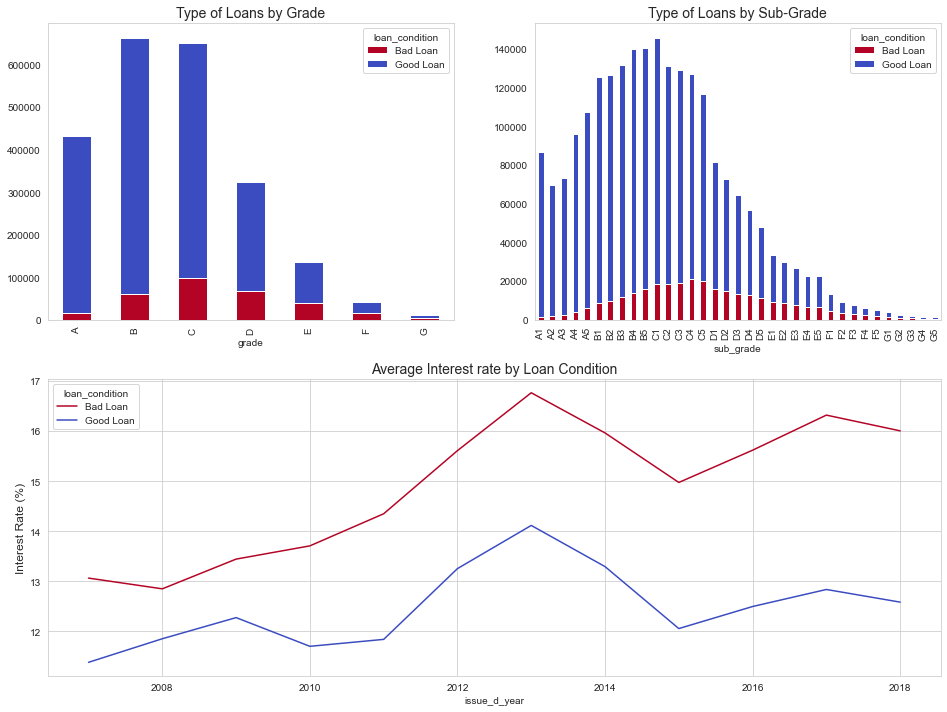

In [ ]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = accepted_df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = accepted_df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = accepted_df.groupby(['issue_d_year', 'loan_condition']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

## _Data Preprocessing_

In [ ]:
# Import basic data science packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import encoders for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None) # display all columns without compression

In [ ]:
accepted_df = pd.read_csv('/content/accepted_2007_to_2018Q4.csv')
#accepted_df_copy = accepted_df.copy()

In [ ]:
accepted_df.shape

(2260701, 151)

In [ ]:
columns= accepted_df.columns.to_list()
sorted(columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'deferral_term',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'disbursement_method',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_flag',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_

In [ ]:
accepted_df.rename(columns={'acc_now_delinq':'acc_now_dealing',
                           'delinq_2yrs':'deling_2yrs',
                           'inq_last_6mths':'ing_last_6mths'},inplace=True)

In [ ]:
date_frame_columns = ['earliest_cr_line','issue_d', 'last_credit_pull_d','last_pymnt_d','last_pymnt_d','last_credit_pull_d']
accepted_df[date_frame_columns]

,earliest_cr_line,issue_d,last_credit_pull_d,last_pymnt_d,last_pymnt_d,last_credit_pull_d
0,Aug-2003,Dec-2015,Mar-2019,Jan-2019,Jan-2019,Mar-2019
1,Dec-1999,Dec-2015,Mar-2019,Jun-2016,Jun-2016,Mar-2019
2,Aug-2000,Dec-2015,Mar-2019,Jun-2017,Jun-2017,Mar-2019
3,Sep-2008,Dec-2015,Mar-2019,Feb-2019,Feb-2019,Mar-2019
4,Jun-1998,Dec-2015,Mar-2018,Jul-2016,Jul-2016,Mar-2018
...,...,...,...,...,...,...
2260696,Feb-1995,Oct-2016,Mar-2019,Mar-2019,Mar-2019,Mar-2019
2260697,Jul-1999,Oct-2016,Mar-2019,Oct-2017,Oct-2017,Mar-2019
2260698,Jun-1996,Oct-2016,Mar-2019,Mar-2019,Mar-2019,Mar-2019
2260699,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.DataFrame({'no.of null values':accepted_df[date_frame_columns].isnull().sum(),
             '% of null values': ((accepted_df[date_frame_columns].isnull().sum())/len(accepted_df))*100})

,no.of null values,% of null values
earliest_cr_line,62,0.002743
issue_d,33,0.001460
last_credit_pull_d,105,0.004645
last_pymnt_d,2460,0.108816
last_pymnt_d,2460,0.108816
last_credit_pull_d,105,0.004645


In [ ]:
# dropping the null rows

accepted_df.dropna(subset=date_frame_columns,inplace=True)

In [ ]:
# columns containing more than 30% null values
null_columns_greaterthan_30 = accepted_df.columns[((accepted_df.isnull().sum()/len(accepted_df)) * 100 ) > 30].tolist()
sorted(null_columns_greaterthan_30)

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [ ]:
null_columns_greaterthan_30.remove('max_bal_bc')
null_columns_greaterthan_30.remove('total_bal_il')
len(null_columns_greaterthan_30)

56

In [ ]:
# dropping all columns having null values greater than 30%

accepted_df = accepted_df.drop(columns=null_columns_greaterthan_30)
accepted_df.shape

(2258141, 95)

In [ ]:
for col in date_frame_columns:
    date = pd.to_datetime(accepted_df[col])
    accepted_df[col+'_year'] = date.dt.year
    accepted_df[col+'_month'] = date.dt.month
    
accepted_df.shape

(2258141, 103)

In [ ]:
# pecentage of null values in each column
pd.DataFrame({'no. of null values':accepted_df.isnull().sum(),
             '% of null values':(accepted_df.isnull().sum()/len(accepted_df))*100}).T

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,deling_2yrs,earliest_cr_line,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166677.00000,146657.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23286.000000,1.000000,0.0,1707.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1763.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,0.0,0.0,0.0,70130.000000,70130.000000,865401.000000,865401.000000,70130.000000,49899.000000,70199.000000,74731.000000,75866.000000,115.000000,0.0,138725.000000,70131.000000,70131.000000,70130.000000,49899.000000,73213.00000,295041.000000,70130.000000,70130.000000,70130.000000,58450.000000,70130.000000,70130.000000,70130.000000,70131.000000,70130.000000,58450.000000,153382.000000,70130.000000,70130.000000,70130.000000,70284.000000,75174.000000,1332.000000,75.000000,70130.000000,49899.000000,49899.000000,70130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.38116,6.49459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031202,0.000044,0.0,0.075593,0.0,0.0,0.0,0.0,0.000044,0.0,0.0,0.0,0.078073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005093,0.0,0.0,0.0,3.105652,3.105652,38.323603,38.323603,3.105652,2.209738,3.108708,3.309404,3.359666,0.005093,0.0,6.143328,3.105696,3.105696,3.105652,2.209738,3.24218,13.065659,3.105652,3.105652,3.105652,2.588412,3.105652,3.105652,3.105652,3.105696,3.105652,2.588412,6.792401,3.105652,3.105652,3.105652,3.112472,3.329022,0.058987,0.003321,3.105652,2.209738,2.209738,3.105652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# number of unique values in each column
for col in accepted_df.columns:
    print(f'number of unique values in {col} are:',len(accepted_df[col].unique()))

number of unique values in id are: 2258141
number of unique values in loan_amnt are: 1572
number of unique values in funded_amnt are: 1572
number of unique values in funded_amnt_inv are: 10057
number of unique values in term are: 2
number of unique values in int_rate are: 673
number of unique values in installment are: 93251
number of unique values in grade are: 7
number of unique values in sub_grade are: 35
number of unique values in emp_title are: 512196
number of unique values in emp_length are: 12
number of unique values in home_ownership are: 6
number of unique values in annual_inc are: 89314
number of unique values in verification_status are: 3
number of unique values in issue_d are: 139
number of unique values in loan_status are: 9
number of unique values in pymnt_plan are: 2
number of unique values in url are: 2258141
number of unique values in purpose are: 14
number of unique values in title are: 63072
number of unique values in zip_code are: 957
number of unique values in add

In [ ]:
accepted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258141 entries, 0 to 2260698
Columns: 103 entries, id to last_pymnt_d_month
dtypes: float64(71), int64(8), object(24)
memory usage: 1.7+ GB


In [ ]:
numeric_columns = accepted_df.columns[accepted_df.dtypes!=np.object].tolist()
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()

## Dealing with Object Columns

In [ ]:
accepted_df[object_columns].head(3)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N


In [ ]:
# on looking from above data we find below columns are not required and hence dropping them
accepted_df.drop(columns=['id','sub_grade','emp_title','url','purpose','title','zip_code','addr_state'],inplace=True)
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
accepted_df[object_columns].head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Aug-2003,w,Jan-2019,Mar-2019,Individual,N,Cash,N
1,36 months,C,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Dec-1999,w,Jun-2016,Mar-2019,Individual,N,Cash,N
2,60 months,B,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,Aug-2000,w,Jun-2017,Mar-2019,Joint App,N,Cash,N
3,60 months,C,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,n,Sep-2008,w,Feb-2019,Mar-2019,Individual,N,Cash,N
4,60 months,F,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,Jun-1998,w,Jul-2016,Mar-2018,Individual,N,Cash,N


In [ ]:
# datetime columns can be dropped as these are already converted into datetime

accepted_df.drop(columns=date_frame_columns,inplace=True)
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
accepted_df[object_columns].head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Individual,N,Cash,N
1,36 months,C,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Individual,N,Cash,N
2,60 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,n,w,Joint App,N,Cash,N
3,60 months,C,10+ years,MORTGAGE,Source Verified,Current,n,w,Individual,N,Cash,N
4,60 months,F,3 years,MORTGAGE,Source Verified,Fully Paid,n,w,Individual,N,Cash,N


#### Dealing with Missing Values

In [ ]:
# pecentage of null values in each object column
print('Total missing values in object columns:',accepted_df[object_columns].isnull().sum().sum())
print('Total % of missing values in object columns:',(accepted_df[object_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[object_columns].isnull().sum(),
             '% of null values':(accepted_df[object_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in object columns: 146657
Total % of missing values in object columns: 6.494590018958073


,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
no. of null values,0.0,0.0,146657.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,6.49459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# employee_length, missing values can be replaced by with it's mode, as in this case lone is approved
print(accepted_df['emp_length'].mode())
accepted_df['emp_length'].fillna(value='10+ years',inplace=True)

0    10+ years
dtype: object


In [ ]:
print('Total missing values in object columns:',accepted_df[object_columns].isnull().sum().sum())

Total missing values in object columns: 0


In [ ]:
# unique values length
for col in object_columns:
    print(f'Unique values in this {col}:',len(accepted_df[col].unique()))

Unique values in this term: 2
Unique values in this grade: 7
Unique values in this emp_length: 11
Unique values in this home_ownership: 6
Unique values in this verification_status: 3
Unique values in this loan_status: 9
Unique values in this pymnt_plan: 2
Unique values in this initial_list_status: 2
Unique values in this application_type: 2
Unique values in this hardship_flag: 2
Unique values in this disbursement_method: 2
Unique values in this debt_settlement_flag: 2


In [ ]:
# term and emp_length must be numbers
accepted_df['term']=accepted_df['term'].replace((' 36 months',' 60 months'),(36,60))
accepted_df['emp_length'] = accepted_df['emp_length'].replace(('10+ years','3 years','6 years','1 year','5 years','9 years','< 1 year','2 years','4 years','8 years','7 years'),
                                 (10,3,6,1,5,9,0,2,4,8,7))

In [ ]:
object_columns = accepted_df.columns[accepted_df.dtypes==np.object].tolist()
object_columns

['grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [ ]:
# Label Binarizer
label_binary_columns = ['pymnt_plan','initial_list_status','application_type','hardship_flag','disbursement_method',
                        'debt_settlement_flag']

labelb = LabelBinarizer()
for col in label_binary_columns:
    accepted_df[col] = labelb.fit_transform(accepted_df[col])

object_columns

labele = LabelEncoder()
#accepted_df['grade'] = labele.fit_transform(accepted_df['grade']) # grade label encoded

object_columns.remove('grade')

for col in object_columns:
    print(f'unique values in {col} are:',accepted_df[col].unique())
    print(f'number of unique values in {col} are:',len(accepted_df[col].unique()))

#label encoding remaining object columns
accepted_df['home_ownership'] = labele.fit_transform(accepted_df['home_ownership'])

accepted_df['verification_status'] = labele.fit_transform(accepted_df['verification_status'])

accepted_df['loan_status'] = labele.fit_transform(accepted_df['loan_status'])

unique values in home_ownership are: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
number of unique values in home_ownership are: 6
unique values in verification_status are: ['Not Verified' 'Source Verified' 'Verified']
number of unique values in verification_status are: 3
unique values in loan_status are: ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
number of unique values in loan_status are: 9
unique values in pymnt_plan are: [0 1]
number of unique values in pymnt_plan are: 2
unique values in initial_list_status are: [1 0]
number of unique values in initial_list_status are: 2
unique values in application_type are: [0 1]
number of unique values in application_type are: 2
unique values in hardship_flag are: [0 1]
number of unique values in hardship_flag are: 2
unique values in disbursement_method are: [0 1]
number 

In [ ]:
accepted_df[object_columns].head()

,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,1,0,5,0,1,0,0,0,0
1,1,0,5,0,1,0,0,0,0
2,1,0,5,0,1,1,0,0,0
3,1,1,1,0,1,0,0,0,0
4,1,1,5,0,1,0,0,0,0


In [ ]:
accepted_df['grade'][:5]

0    C
1    C
2    B
3    C
4    F
Name: grade, dtype: object

### Dealing with Numeric Columns

In [ ]:
accepted_df[numeric_columns].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,4981.0,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,2003,8,2015,12,2019,3,2019,1
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,18005.0,6472.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1999,12,2015,12,2019,3,2016,6
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,10827.0,2081.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,2000,8,2015,12,2019,3,2017,6
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,0.0,0.0,301500.0,12609.0,6987.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,2008,9,2015,12,2019,3,2019,2
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,73839.0,9702.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,1998,6,2015,12,2018,3,2016,7


#### Missing values

In [ ]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 4411494
Total % of missing values in numceric columns: 195.35954575024323


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,1707.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1763.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.000000,0.0,0.0,70130.000000,70130.000000,865401.000000,865401.000000,70130.000000,49899.000000,70199.000000,74731.000000,75866.000000,115.000000,0.0,138725.000000,70131.000000,70131.000000,70130.000000,49899.000000,73213.00000,295041.000000,70130.000000,70130.000000,70130.000000,58450.000000,70130.000000,70130.000000,70130.000000,70131.000000,70130.000000,58450.000000,153382.000000,70130.000000,70130.000000,70130.000000,70284.000000,75174.000000,1332.000000,75.000000,70130.000000,49899.000000,49899.000000,70130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.075593,0.0,0.0,0.0,0.000044,0.0,0.0,0.0,0.078073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005093,0.0,0.0,3.105652,3.105652,38.323603,38.323603,3.105652,2.209738,3.108708,3.309404,3.359666,0.005093,0.0,6.143328,3.105696,3.105696,3.105652,2.209738,3.24218,13.065659,3.105652,3.105652,3.105652,2.588412,3.105652,3.105652,3.105652,3.105696,3.105652,2.588412,6.792401,3.105652,3.105652,3.105652,3.112472,3.329022,0.058987,0.003321,3.105652,2.209738,2.209738,3.105652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
((accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100) < 2

loan_amnt                   True
funded_amnt                 True
funded_amnt_inv             True
int_rate                    True
installment                 True
                            ... 
issue_d_month               True
last_credit_pull_d_year     True
last_credit_pull_d_month    True
last_pymnt_d_year           True
last_pymnt_d_month          True
Length: 79, dtype: bool

In [ ]:
numeric_null_columns_less_than_2 = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100) < 2].tolist()
numeric_null_columns_less_than_2

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'deling_2yrs',
 'fico_range_low',
 'fico_range_high',
 'ing_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_dealing',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'earliest_cr_line_year',
 'earliest_cr_line_month',
 'issue_d_year',
 'issue_d_month',
 'last_credit_pull_d_year',
 'last_credit_pull_d_month',
 'last_pymnt_d_year',
 'last_pymnt_d_month']

In [ ]:
numeric_null = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df)) * 100) != 0]

In [ ]:
accepted_df.dropna(subset = numeric_null_columns_less_than_2,inplace=True)

In [ ]:
numeric_null_remaining = list(set(numeric_null) - set(numeric_null_columns_less_than_2))
numeric_null_remaining

['avg_cur_bal',
 'num_tl_op_past_12m',
 'acc_open_past_24mths',
 'mo_sin_rcnt_tl',
 'mths_since_recent_inq',
 'num_rev_tl_bal_gt_0',
 'num_accts_ever_120_pd',
 'total_bal_il',
 'mo_sin_old_rev_tl_op',
 'num_il_tl',
 'bc_util',
 'total_bal_ex_mort',
 'num_tl_120dpd_2m',
 'num_rev_accts',
 'num_actv_rev_tl',
 'mort_acc',
 'num_bc_sats',
 'pct_tl_nvr_dlq',
 'total_bc_limit',
 'tot_coll_amt',
 'num_sats',
 'total_il_high_credit_limit',
 'mths_since_recent_bc',
 'num_bc_tl',
 'num_actv_bc_tl',
 'bc_open_to_buy',
 'num_op_rev_tl',
 'mo_sin_rcnt_rev_tl_op',
 'max_bal_bc',
 'total_rev_hi_lim',
 'mo_sin_old_il_acct',
 'num_tl_90g_dpd_24m',
 'tot_cur_bal',
 'num_tl_30dpd',
 'percent_bc_gt_75',
 'tot_hi_cred_lim']

In [ ]:
accepted_df[numeric_columns].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
count,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2253340.0,2.253340e+06,2.184632e+06,2.184632e+06,1.389730e+06,1.389730e+06,2.184632e+06,2.204844e+06,2.184632e+06,2.181524e+06,2.180611e+06,2.253340e+06,2.253340e+06,2.116255e+06,2.184632e+06,2.184632e+06,2.184632e+06,2.204844e+06,2.182916e+06,1.960474e+06,2.184632e+06,2.184632e+06,2.184632e+06,2.196303e+06,2.184632e+06,2.184632e+06,2.184632e+06,2.184631e+06,2.184632e+06,2.196303e+06,2.101380e+06,2.184632e+06,2.184632e+06,2.184632e+06,2.184478e+06,2.181081e+06,2.253340e+06,2.253340e+06,2.184632e+06,2.204844e+06,2.204844e+06,2.184632e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06,2.253340e+06
mean,1.504931e+04,1.504412e+04,1.503002e+04,1.308751e+01,4.458287e+02,7.805346e+04,1.883249e+01,3.067549e-01,6.985702e+02,7.025704e+02,5.757498e-01,1.162292e+01,1.978135e-01,1.666749e+04,5.034803e+01,2.417888e+01,4.206776e+03,4.205850e+03,1.210121e+04,1.208699e+04,9.521783e+03,2.435226e+03,1.517679e+00,1.426855e+02,2.380555e+01,3.435402e+03,6.877859e+02,6.757396e+02,1.815971e-02,1.0,4.148952e-03,2.325524e+02,1.424937e+05,3.552506e+04,5.810217e+03,3.459259e+04,4.524161e+00,1.351626e+04,1.139204e+04,5.791044e+01,8.462105e-03,1.233405e+01,1.257534e+02,1.815111e+02,1.398044e+01,8.284891e+00,1.555847e+00,2.482292e+01,7.024941e+00,5.001904e-01,3.680031e+00,5.635598e+00,4.778819e+00,7.731588e+00,8.416332e+00,8.254505e+00,1.401405e+01,5.584038e+00,1.163715e+01,6.367244e-04,2.813288e-03,8.286155e-02,2.077805e+00,9.411781e+01,4.244188e+01,1.283175e-01,4.684690e-02,1.782536e+05,5.103922e+04,2.320949e+04,4.374382e+04,1.999462e+03,6.739289e+00,2.015861e+03,6.752751e+00,2.018397e+03,4.362305e+00,2.017634e+03,5.039230e+00
std,9.185811e+03,9.183957e+03,9.184883e+03,4.829135e+00,2.670080e+02,1.127745e+05,1.415805e+01,8.668932e-01,3.298649e+01,3.298735e+01,8.805040e-01,5.638096e+00,5.708875e-01,2.289656e+04,2.470245e+01,1.198520e+01,7.340157e+03,7.339252e+03,9.901897e+03,9.896163e+03,8.321667e+03,2.681045e+03,1.184476e+01,7.433267e+02,1.305559e+02,6.021459e+03,7.279412e+01,1.107018e+02,1.508479e-01,0.0,6.963403e-02,8.510126e+03,1.605022e+05,4.411007e+04,5.684507e+03,3.668705e+04,3.163723e+00,1.632074e+04,1.659330e+04,2.857556e+01,1.047876e-01,7.249313e+02,5.337631e+01,9.712331e+01,1.742157e+01,9.166660e+00,1.905281e+00,3.226005e+01,5.964488e+00,1.350018e+00,2.323537e+00,3.380893e+00,3.036550e+00,4.701381e+00,7.358707e+00,4.680967e+00,

In [ ]:
accepted_df.dropna(subset=['max_bal_bc', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il'],how='all',inplace=True)

In [ ]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 2075552
Total % of missing values in numceric columns: 95.0069393838413


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,794902.000000,794902.000000,0.0,0.0,0.0,23067.000000,23968.000000,0.0,0.0,68377.000000,0.0,0.0,0.0,0.0,21703.00000,241716.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,83252.000000,0.0,0.0,0.0,154.000000,23510.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.386082,36.386082,0.0,0.0,0.0,1.055876,1.097118,0.0,0.0,3.129909,0.0,0.0,0.0,0.0,0.99344,11.064381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.0,0.0,3.810802,0.0,0.0,0.0,0.007049,1.076154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
accepted_df.shape

(2184632, 91)

In [ ]:
numeric_null_columns_less_than_5 = accepted_df[numeric_columns].columns[((accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100) < 5].tolist()
accepted_df.dropna(subset=numeric_null_columns_less_than_5,inplace=True)

In [ ]:
# pecentage of null values in each numeric column
print('Total missing values in numeric columns:',accepted_df[numeric_columns].isnull().sum().sum())
print('Total % of missing values in numceric columns:',(accepted_df[numeric_columns].isnull().sum().sum()/len(accepted_df))*100)
pd.DataFrame({'no. of null values':accepted_df[numeric_columns].isnull().sum(),
             '% of null values':(accepted_df[numeric_columns].isnull().sum()/len(accepted_df))*100}).T

Total missing values in numeric columns: 1693558
Total % of missing values in numceric columns: 84.1806867735719


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
no. of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,736676.000000,736676.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220206.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
% of null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.617519,36.617519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.94565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
numeric_null = accepted_df[numeric_columns].columns[(accepted_df[numeric_columns].isnull().sum()>0)].tolist()
accepted_df[numeric_null]

,total_bal_il,max_bal_bc,mths_since_recent_inq
0,4981.0,722.0,4.0
1,18005.0,6472.0,0.0
2,10827.0,2081.0,10.0
3,12609.0,6987.0,NaN
4,73839.0,9702.0,1.0
...,...,...,...
2260693,8872.0,6460.0,13.0
2260695,118453.0,4090.0,4.0
2260696,19765.0,5141.0,1.0
2260697,44785.0,6172.0,9.0


In [ ]:
accepted_df[numeric_null].describe()

,total_bal_il,max_bal_bc,mths_since_recent_inq
count,1.275137e+06,1.275137e+06,1.791607e+06
mean,3.679309e+04,5.819536e+03,7.084087e+00
std,4.458408e+04,5.612039e+03,5.970168e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.960000e+03,2.347000e+03,2.000000e+00
50%,2.417600e+04,4.449000e+03,6.000000e+00
75%,4.735000e+04,7.603000e+03,1.100000e+01
max,1.837038e+06,1.170668e+06,2.400000e+01


In [ ]:
accepted_df.reset_index(inplace=True,drop=True)

In [ ]:
accepted_df[numeric_columns] = accepted_df[numeric_columns].fillna(value=accepted_df[numeric_columns].mean())

In [ ]:
accepted_df.isnull().sum().sum() # no null values present

0

In [ ]:
accepted_df.to_csv('final_cleaned_accepted.csv')

In [ ]:
model_df=accepted_df[['funded_amnt_inv','int_rate','grade','emp_length','annual_inc','pymnt_plan','dti','deling_2yrs','fico_range_low','ing_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                      'initial_list_status','total_rec_late_fee','last_pymnt_amnt','last_fico_range_high','last_fico_range_low','collections_12_mths_ex_med','policy_code','application_type',
                      'acc_now_dealing','tot_coll_amt','tot_cur_bal','total_bal_il','max_bal_bc','issue_d_month','earliest_cr_line_month','earliest_cr_line_year','last_pymnt_d_year',
                      'last_credit_pull_d_month','last_credit_pull_d_year']]

In [ ]:
model_df.head()

,funded_amnt_inv,int_rate,grade,emp_length,annual_inc,pymnt_plan,dti,deling_2yrs,fico_range_low,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,issue_d_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,13.99,C,10,55000.0,0,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,4981.0,722.0,12,8,2003,2019,3,2019
1,24700.0,11.99,C,10,65000.0,0,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,18005.0,6472.0,12,12,1999,2016,3,2019
2,20000.0,10.78,B,10,63000.0,0,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,10827.0,2081.0,12,8,2000,2017,3,2019
3,35000.0,14.85,C,10,110000.0,0,17.06,0.0,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,1,0.0,829.90,679.0,675.0,0.0,1.0,0,0.0,0.0,301500.0,12609.0,6987.0,12,9,2008,2019,3,2019
4,10400.0,22.45,F,3,104433.0,0,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,73839.0,9702.0,12,6,1998,2016,3,2018


In [ ]:
model_df.shape

(2011813, 34)

In [ ]:
model_df.isna().sum()

funded_amnt_inv               0
int_rate                      0
grade                         0
emp_length                    0
annual_inc                    0
pymnt_plan                    0
dti                           0
deling_2yrs                   0
fico_range_low                0
ing_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_late_fee            0
last_pymnt_amnt               0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_dealing               0
tot_coll_amt                  0
tot_cur_bal                   0
total_bal_il                  0
max_bal_bc                    0
issue_d_month                 0
earliest_cr_line_month        0
earliest_cr_line_year         0
last_pym

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011813 entries, 0 to 2011812
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   funded_amnt_inv             float64
 1   int_rate                    float64
 2   grade                       object 
 3   emp_length                  int64  
 4   annual_inc                  float64
 5   pymnt_plan                  int64  
 6   dti                         float64
 7   deling_2yrs                 float64
 8   fico_range_low              float64
 9   ing_last_6mths              float64
 10  open_acc                    float64
 11  pub_rec                     float64
 12  revol_bal                   float64
 13  revol_util                  float64
 14  total_acc                   float64
 15  initial_list_status         int64  
 16  total_rec_late_fee          float64
 17  last_pymnt_amnt             float64
 18  last_fico_range_high        float64
 19  last_fico_range_low  

In [ ]:
#creating dependent and independent variable
X = model_df.drop(['grade'],axis=1)
y=model_df.grade

In [ ]:
#checking independence between independent features using vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.round(1)

,VIF Factor,features
0,1.5,funded_amnt_inv
1,1.5,int_rate
2,1.1,emp_length
3,1.1,annual_inc
4,1.0,pymnt_plan
5,1.2,dti
6,1.1,deling_2yrs
7,1.9,fico_range_low
8,1.1,ing_last_6mths
9,2.2,open_acc


In [ ]:
X=X.drop(['policy_code'],axis=1)

In [ ]:
#Splitting of data set into test and train
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1408269, 32), (603544, 32), (1408269,), (603544,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.3841376933578993


In [ ]:
print('Accuray: {}'.format(clf.score(X_train,y_train)))

Accuray: 0.38206905072823444


In [ ]:
#feature scaling of independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler() 
X_train= std.fit_transform(X_train)
X_test=std.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.721150404941479


In [ ]:
print('Accuray: {}'.format(clf.score(X_train,y_train)))

Accuray: 0.7193398420330207


In [ ]:
y_pred=clf.predict(X_test)
y_pred

array(['C', 'A', 'C', ..., 'A', 'A', 'B'], dtype='<U1')

In [ ]:
actual_predicted= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_predicted.head()

,Actual,Predicted
1045977,E,C
754141,A,A
1443505,C,C
550330,C,C
971625,C,C


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

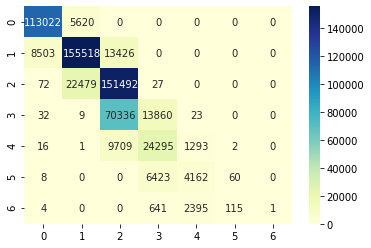

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.93      0.95      0.94    118642
           B       0.85      0.88      0.86    177447
           C       0.62      0.87      0.72    174070
           D       0.31      0.16      0.21     84260
           E       0.16      0.04      0.06     35316
           F       0.34      0.01      0.01     10653
           G       1.00      0.00      0.00      3156

    accuracy                           0.72    603544
   macro avg       0.60      0.42      0.40    603544
weighted avg       0.67      0.72      0.68    603544



In [ ]:
grade=model_df['grade'].unique()
len(grade)

7

In [ ]:
auc = roc_auc_score(y_test,grade_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9645239942509239
